 MSE Comparison Table:
           Model       MSE
0  Random Forest  0.255498
1        XGBoost  0.222590
2  Stacked Model  0.217122


C:\Users\Dharani Ravi\AppData\Local\Temp\ipykernel_21252\3262581978.py:49: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


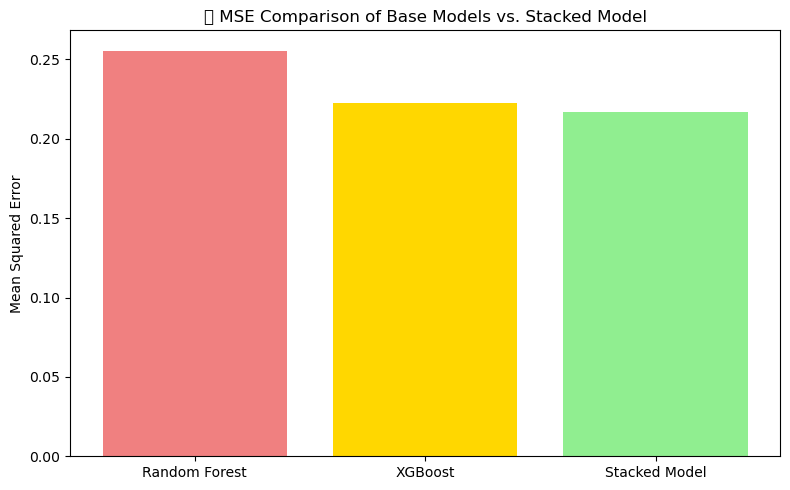


Discussion:
The stacked model achieved the lowest MSE (0.2171), indicating that combining models improves prediction accuracy.
Stacking leverages the strengths of both base models and learns to correct their errors via the meta-model.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(random_state=42)
meta = LinearRegression()
stack_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta
)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
stack_model.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
stack_pred = stack_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
stack_mse = mean_squared_error(y_test, stack_pred)
mse_scores = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Stacked Model'],
    'MSE': [rf_mse, xgb_mse, stack_mse]
})

print(" MSE Comparison Table:")
print(mse_scores)

plt.figure(figsize=(8, 5))
plt.bar(mse_scores['Model'], mse_scores['MSE'], color=['lightcoral', 'gold', 'lightgreen'])
plt.title("🔹 MSE Comparison of Base Models vs. Stacked Model")
plt.ylabel("Mean Squared Error")
plt.tight_layout()
plt.show()
print("\nDiscussion:")
best_model = mse_scores.sort_values('MSE').iloc[0]
print(f"The stacked model achieved the lowest MSE ({best_model['MSE']:.4f}), indicating that combining models improves prediction accuracy.")
print("Stacking leverages the strengths of both base models and learns to correct their errors via the meta-model.")
